# HW04: Nonparametric Regression
## Hamza Dehidi KU 0077989
### November 20, 2021

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Importing Data

In [2]:
# read data into memory
data_set = np.genfromtxt("hw04_data_set.csv", delimiter = ",")

# x and y training values
x_training = data_set[1:151,0]
y_training = data_set[1:151,1]


# x and y test values
x_test = data_set[151:,0]
y_test = data_set[151:,1]


## Drawing Parameters

In [3]:
point_colors = np.array(["red", "blue"])
minimum_value = +1.5
maximum_value = +5.2
data_interval = np.linspace(minimum_value, maximum_value, 741)

bin_width = 0.37
left_borders = np.arange(minimum_value, maximum_value, bin_width)
right_borders = np.arange(minimum_value + bin_width, maximum_value + bin_width, bin_width)

## Regressogram

$\hat{g}(x) = \dfrac{\sum \limits_{i = 1}^{N} b({x, x_{i}})y_{i}}{\sum \limits_{i = 1}^{N} b({x, x_{i}})}$

**Where**

$ b({x, x_{i}})=   \left\{
\begin{array}{ll}
      1 & \text{if $x_{i}$ is the same bin with $x$} \\
      0 & \text{otherwise} \\
      \end{array} 
\right.  $

In [4]:
def regressogram(x_values,bin_width = 0.37):
    g_hat = np.asarray([np.mean(y_training[(left_borders[b]<x_training) & (x_training<= right_borders[b])])
                        for b in range(len(left_borders))])
    
    y_predicted = np.asarray([g_hat[b] for x in x_values for b in range(len(left_borders)) 
                          if ((left_borders[b] <=x) & (x < right_borders[b]))])
    return y_predicted

#### Drawing the Regressogram

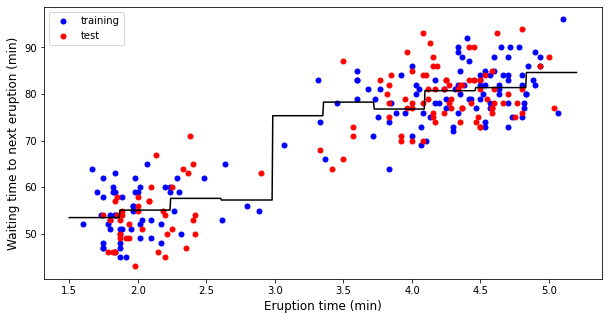

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(x_training,y_training, "b.", markersize = 10,label ='training')
plt.plot(x_test,y_test, "r.", markersize = 10,label ='test')
plt.legend()
plt.xlabel('Eruption time (min)', fontsize=12)
plt.ylabel('Waiting time to next eruption (min)', fontsize=12)

plt.plot(data_interval, regressogram(data_interval), "k-")
plt.show()

#### Calculating the root mean squared error

$\sqrt{\dfrac{\sum \limits_{i = 1}^{N_{test}} ({y_{i} - \hat{y}_{i}})^2}{N_{test}}}$

In [6]:
RMSE = np.sqrt(np.mean(np.square(y_test - regressogram(x_test))))
print(f'Regressogram => RMSE is {RMSE} when h is {bin_width}')

Regressogram => RMSE is 5.962617204275405 when h is 0.37


## Running Mean Smoother

$\hat{g}(x) = \dfrac{\sum \limits_{i = 1}^{N} w(\dfrac{x- x_{i}}{h})y_{i}}{\sum \limits_{i = 1}^{N} w(\dfrac{x- x_{i}}{h})}$

**Where**

$ w({u})=   \left\{
\begin{array}{ll}
      1 & \text{if $|u|$ <1/2}\\
      0 & \text{otherwise} \\
      \end{array} 
\right.  $

In [7]:
def running_mean_smoother(x_values,bin_width = 0.37):
    g_hat = np.asarray([np.mean(y_training[np.absolute((x - x_training)/bin_width)<0.5]) for x in (x_values)])
    return g_hat

#### Drawing the Running Mean Smoother

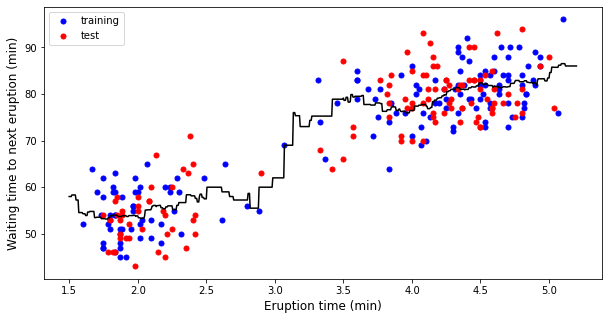

In [8]:
rms = running_mean_smoother(data_interval,bin_width = 0.37)

plt.figure(figsize = (10, 5))
plt.plot(x_training,y_training, "b.", markersize = 10,label ='training')
plt.plot(x_test,y_test, "r.", markersize = 10,label ='test')
plt.legend()
plt.xlabel('Eruption time (min)', fontsize=12)
plt.ylabel('Waiting time to next eruption (min)', fontsize=12)
plt.plot(data_interval, rms, "k-")

plt.show()

In [9]:
rms

array([58.        , 58.        , 58.        , 58.        , 58.33333333,
       58.33333333, 58.33333333, 58.33333333, 58.33333333, 58.33333333,
       57.25      , 57.25      , 57.25      , 57.25      , 54.55555556,
       54.55555556, 54.55555556, 54.55555556, 54.55555556, 54.55555556,
       54.3       , 54.3       , 54.3       , 54.3       , 53.92307692,
       53.92307692, 53.92307692, 54.66666667, 54.66666667, 54.66666667,
       54.8       , 54.8       , 54.8       , 54.8       , 54.8       ,
       54.8       , 54.8       , 53.48      , 53.48      , 53.48      ,
       53.55555556, 53.55555556, 53.55555556, 53.55555556, 53.55555556,
       53.55555556, 53.55555556, 53.25      , 53.25      , 53.25      ,
       53.25      , 53.25      , 53.25      , 53.17241379, 53.17241379,
       53.17241379, 53.17241379, 53.4516129 , 53.4516129 , 53.4516129 ,
       53.87878788, 53.87878788, 53.87878788, 53.87878788, 54.02941176,
       54.02941176, 54.02941176, 54.        , 54.        , 54.  

#### Calculating the root mean squared error

$\sqrt{\dfrac{\sum \limits_{i = 1}^{N_{test}} ({y_{i} - \hat{y}_{i}})^2}{N_{test}}}$

In [10]:
RMSE = np.sqrt(np.mean(np.square(y_test - running_mean_smoother(x_test))))
print(f'Running Mean Smoother => RMSE is {RMSE} when h is {bin_width}')

Running Mean Smoother => RMSE is 6.089003211720321 when h is 0.37


## Kernel Smoother

$\hat{g}(x) = \dfrac{\sum \limits_{i = 1}^{N} K(\dfrac{x- x_{i}}{h})y_{i}}{\sum \limits_{i = 1}^{N} K(\dfrac{x- x_{i}}{h})}$

$K(u) = \dfrac{1}{\sqrt{2\pi}} \exp\left(-\dfrac{u^2}{2}\right)$

In [11]:
def kernel_smoother(x_values,bin_width= 0.37):
    def k (x):
        return (1 / np.sqrt(2 * math.pi) * np.exp(-0.5 * (x - x_training)**2 / bin_width**2))
    
    g_hat = np.asarray([np.sum(k(x)*y_training)/np.sum(k(x)) for x in x_values])
    return g_hat

#### Drawing the Kernel Smoother

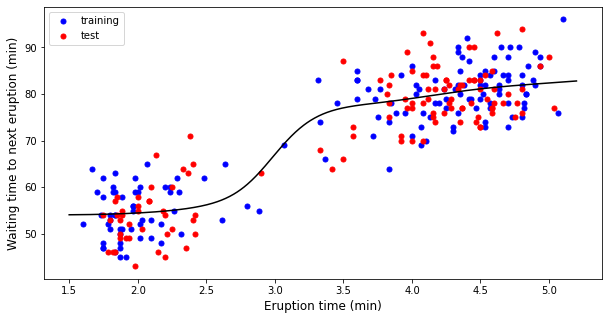

In [12]:
ks = kernel_smoother(data_interval)

plt.figure(figsize = (10, 5))
plt.plot(x_training,y_training, "b.", markersize = 10,label ='training')
plt.plot(x_test,y_test, "r.", markersize = 10,label ='test')
plt.legend()
plt.xlabel('Eruption time (min)', fontsize=12)
plt.ylabel('Waiting time to next eruption (min)', fontsize=12)
plt.plot(data_interval, ks, "k-")

plt.show()

####  Calculating the root mean squared error

$\sqrt{\dfrac{\sum \limits_{i = 1}^{N_{test}} ({y_{i} - \hat{y}_{i}})^2}{N_{test}}}$

In [13]:
RMSE = np.sqrt(np.mean(np.square(y_test-kernel_smoother(x_test))))
print(f'Kernel Smoother => RMSE is {RMSE} when h is {bin_width}')

Kernel Smoother => RMSE is 5.874362846844968 when h is 0.37
